In [16]:
import pandas as pd
from startup import setup_environment
from src.config import PROCESSED_DATA_DIR
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_parquet (PROCESSED_DATA_DIR / 'merged_dataset_hourly.parquet')
df_last = df.tail(7*24)
df_last

,prognostizierte_erzeugung_gesamt,prognostizierte_erzeugung_onshore,prognostizierte_erzeugung_photovoltaik,marktpreis_dänemark_1,marktpreis_dänemark_2,marktpreis_frankreich,marktpreis_italien_(nord),marktpreis_niederlande,marktpreis_polen,marktpreis_schweden_4,...,cross-border_flows_austria_exports,cross-border_flows_austria_imports,cross-border_flows_norway_2_exports,cross-border_flows_norway_2_imports,target_price,regime_de_at_lu,regime_quarter_hourly,carbon_eur_per_ton,ttf_eur_per_mwh,brent_usd_per_barrel
2026-02-20 00:00:00+01:00,57752.05,19386.77,0.0,86.43,95.90,26.91,96.49,84.46,104.59,96.12,...,1515.02,-160.45,528.94,0.0,86.06,0.0,1.0,68.383087,33.522999,71.660004
2026-02-20 01:00:00+01:00,55473.66,18162.10,0.0,86.23,94.92,33.60,93.53,86.05,102.60,95.04,...,1344.04,-131.95,746.95,0.0,85.93,0.0,1.0,70.298081,32.028999,71.760002
2026-02-20 02:00:00+01:00,53204.19,16438.06,0.0,85.56,91.04,31.88,94.81,85.21,101.76,90.88,...,1321.65,-124.24,689.47,0.0,85.44,0.0,1.0,70.298081,32.028999,71.760002
2026-02-20 03:00:00+01:00,51696.15,14846.24,0.0,84.88,84.92,18.95,92.53,84.88,101.76,84.04,...,988.53,-70.76,487.63,0.0,84.88,0.0,1.0,70.298081,32.028999,71.760002
2026-02-20 04:00:00+01:00,51671.21,14298.71,0.0,84.42,84.41,14.82,93.20,83.35,100.93,83.36,...,1074.25,-76.87,167.72,0.0,84.42,0.0,1.0,70.298081,32.028999,71.760002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-26 19:00:00+01:00,58098.03,19217.93,0.0,97.25,97.25,84.52,121.97,NaN,109.23,91.44,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,68.028084,30.891001,70.769997
2026-02-26 20:00:00+01:00,58859.58,20863.36,0.0,88.90,88.89,50.89,115.42,NaN,109.99,72.78,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,68.028084,30.891001,70.769997
2026-02-26 21:00:00+01:00,58301.26,21589.09,0.0,82.00,81.99,28.85,106.50,NaN,96.99,59.07,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,68.028084,30.891001,70.769997
2026-02-26 22:00:00+01:00,56135.08,21565.04,0.0,78.00,77.99,21.23,105.84,NaN,94.74,54.78,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,68.028084,30.891001,70.769997


In [15]:
missing_per_column = df_last.isnull().sum()
print("Missing values per column:")
for idx, col in enumerate(missing_per_column):
    print (missing_per_column.index[idx], col)

Missing values per column:
prognostizierte_erzeugung_gesamt 24
prognostizierte_erzeugung_onshore 24
prognostizierte_erzeugung_photovoltaik 24
marktpreis_dänemark_1 0
marktpreis_dänemark_2 0
marktpreis_frankreich 0
marktpreis_italien_(nord) 0
marktpreis_niederlande 48
marktpreis_polen 0
marktpreis_schweden_4 0
marktpreis_schweiz 0
marktpreis_slowenien 24
marktpreis_tschechien 0
marktpreis_ungarn 48
stromverbrauch_gesamt_(netzlast) 35
prognostizierter_verbrauch_gesamt 0
prognostizierte_erzeugung_sonstige 24
stromerzeugung_braunkohle 34
stromerzeugung_kernenergie 0
stromerzeugung_wind_offshore 34
stromerzeugung_wasserkraft 34
stromerzeugung_sonstige_konventionelle 34
stromerzeugung_sonstige_erneuerbare 34
prognostizierte_erzeugung_offshore 24
stromerzeugung_biomasse 34
stromerzeugung_wind_onshore 34
stromerzeugung_photovoltaik 34
stromerzeugung_steinkohle 34
stromerzeugung_pumpspeicher 34
stromerzeugung_erdgas 34
marktpreis_österreich 0
stromverbrauch_residuallast 35
prognostizierter_verb

In [22]:
def create_plot(daily_status_transposed):
    
    plt.figure(figsize=(max(8, len(daily_status_transposed.columns) * 0.5), 
                    max(6, len(daily_status_transposed) * 0.4)))

    # Create the heatmap
    ax = sns.heatmap(daily_status_transposed,
                    cmap=cmap,
                    vmin=0, vmax=2,
                    linewidths=0.5,
                    linecolor='gray',
                    cbar=False,
                    square=True,
                    annot=False,
                    xticklabels=True,
                    yticklabels=True)

    # Add annotations only for yellow cells (status = 1)
    for i in range(daily_status_transposed.shape[0]):      # rows (columns)
        for j in range(daily_status_transposed.shape[1]):  # columns (days)
            status = daily_status_transposed.iloc[i, j]
            if status == 1:  # Only annotate yellow cells
                annotation = daily_annotations_transposed.iloc[i, j]
                if annotation:  # Only add if there's an annotation
                    # Place text in the center of the cell
                    ax.text(j + 0.5, i + 0.5, annotation,
                        ha='center', va='center',
                        fontsize=8, fontweight='bold',
                        color='black')

    # Improve readability
    plt.title('Daily Missing Data Heatmap (Transposed)\n(Green = none missing, Yellow = some missing, Red = all missing)\nNumbers show last hour with data for yellow cells')
    plt.xlabel('Day')
    plt.ylabel('Columns')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [25]:
daily_groups = df_last.groupby(pd.Grouper(freq='D'))

# Create a list to hold the daily status and last hour info for each column
daily_status_list = []

for day, group in daily_groups:
    # Skip days with no data (if any)
    if group.empty:
        continue

    row = {}
    row['day'] = day.date()  # store the day as a date object

    for col in df_last.columns:
        total = len(group)                # number of rows present for that day
        missing = group[col].isnull().sum()
        
        # Get the last hour where data is available for this column on this day
        non_null_hours = group[col].dropna().index
        if len(non_null_hours) > 0:
            last_hour = non_null_hours[-1].hour
            last_hour_str = f"{last_hour:02d}:00"
        else:
            last_hour_str = ""

        if missing == 0:
            status = 0   # green (no missing)
            info = ""    # no info needed for green
        elif missing == total:
            status = 2   # red   (all missing)
            info = ""    # no info needed for red
        else:
            status = 1   # yellow (some missing)
            info = last_hour_str

        row[col] = status
        row[f"{col}_last_hour"] = info

    daily_status_list.append(row)

# Create DataFrames for status and annotations
daily_status_df = pd.DataFrame(daily_status_list).set_index('day')

# Separate the status and annotation data
status_columns = [col for col in daily_status_df.columns if not col.endswith('_last_hour')]
annotation_columns = [col for col in daily_status_df.columns if col.endswith('_last_hour')]

daily_status = daily_status_df[status_columns]
daily_annotations = daily_status_df[annotation_columns]
daily_annotations.columns = status_columns  # Rename to match the status columns

# -------------------------------------------------------------------
# 3. TRANSPOSE the DataFrames for the heatmap
# -------------------------------------------------------------------
daily_status_transposed = daily_status.T
daily_annotations_transposed = daily_annotations.T

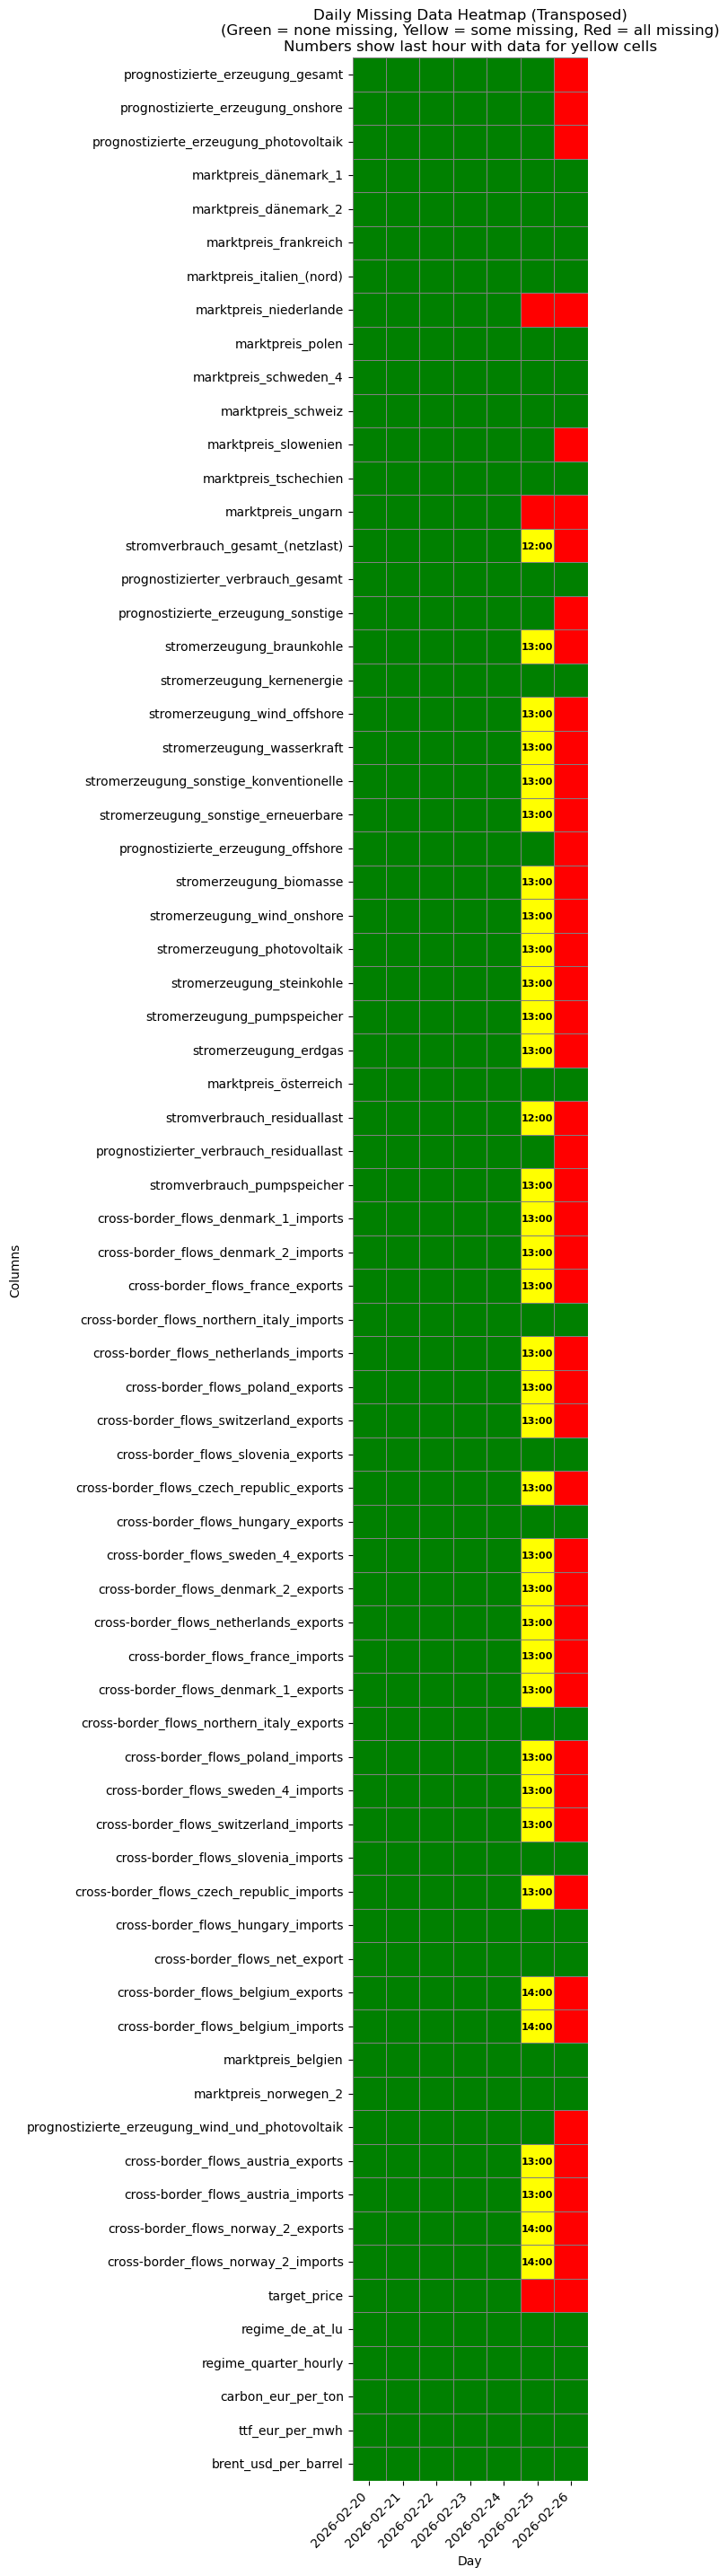

In [ ]:
# -------------------------------------------------------------------
# Group by day (using the date part of the index)


# -------------------------------------------------------------------
# 4. Plot the heatmap with annotations
# -------------------------------------------------------------------
# Define a custom colormap: 0 -> green, 1 -> yellow, 2 -> red
cmap = ['green', 'yellow', 'red']

create_plot(daily_status_transposed)

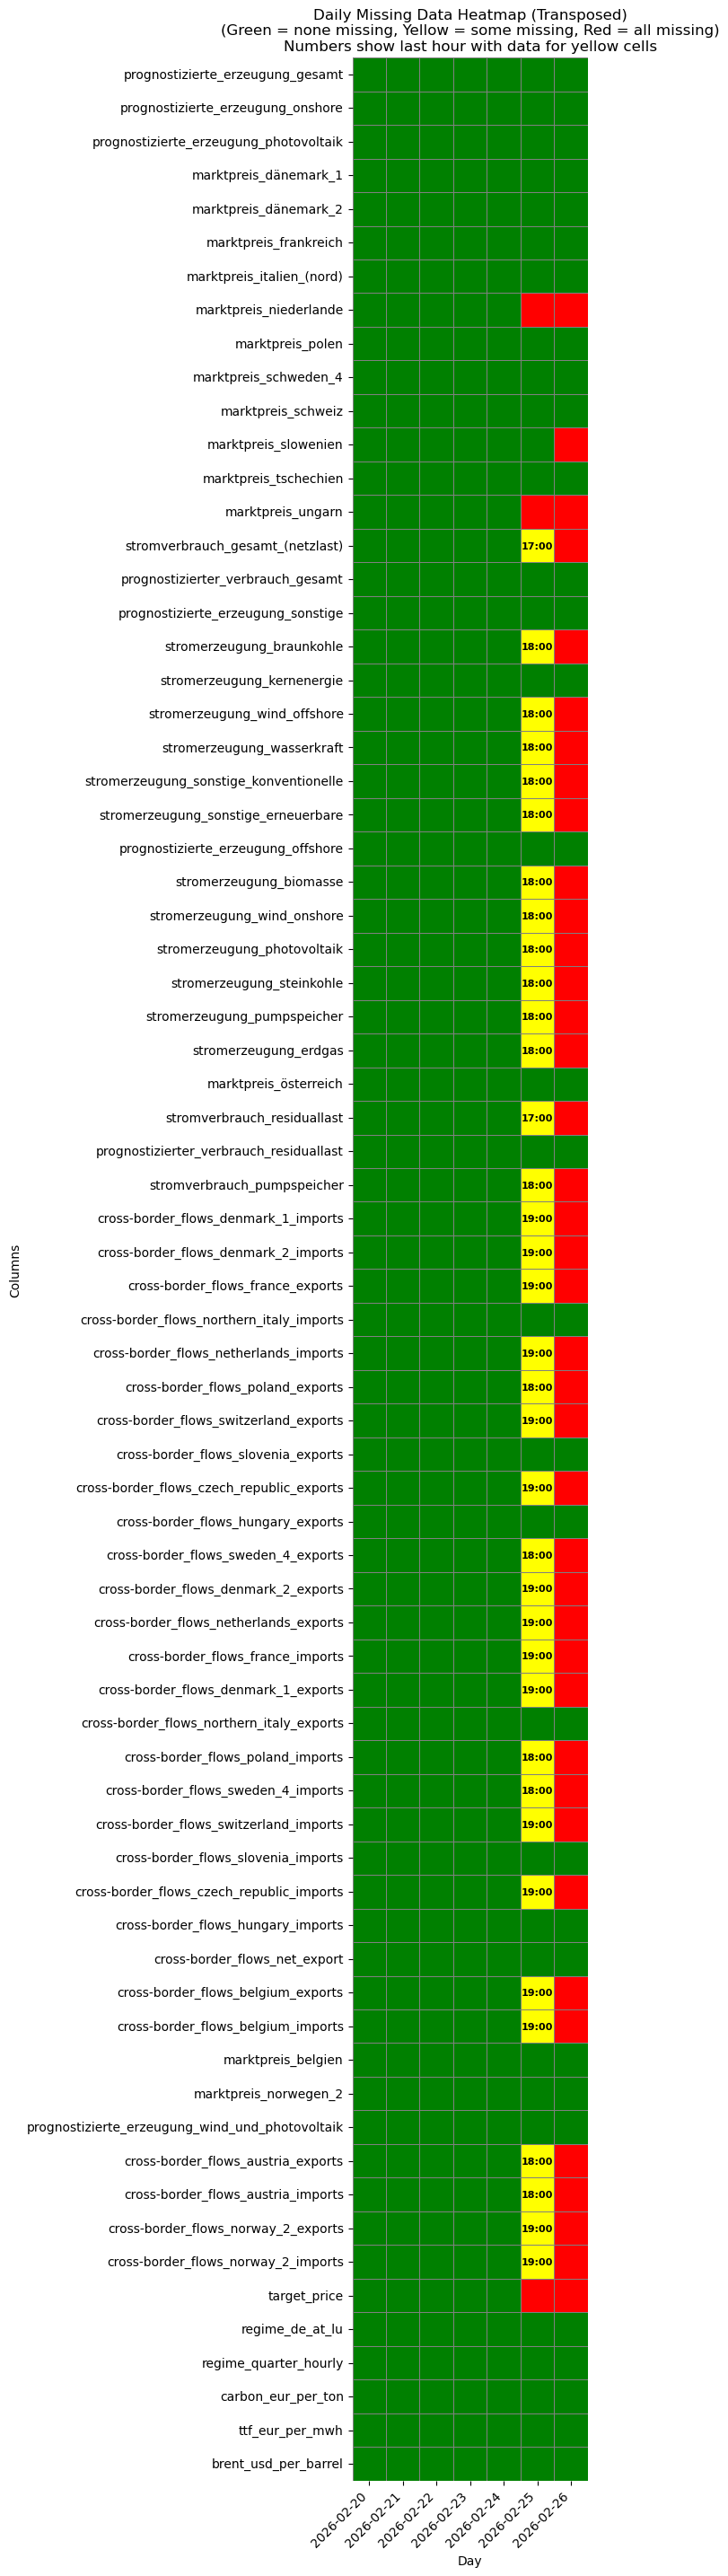

In [26]:
create_plot(daily_status_transposed)

In [20]:
print("\nSummary of yellow cells (some missing data):")
yellow_cells = []
for i in range(daily_status_transposed.shape[0]):
    for j in range(daily_status_transposed.shape[1]):
        if daily_status_transposed.iloc[i, j] == 1:
            col_name = daily_status_transposed.index[i]
            day = daily_status_transposed.columns[j]
            last_hour = daily_annotations_transposed.iloc[i, j]
            yellow_cells.append({
                'Column': col_name,
                'Day': day,
                'Last Hour with Data': last_hour
            })

if yellow_cells:
    yellow_summary = pd.DataFrame(yellow_cells)
    print(yellow_summary.to_string(index=False))
else:
    print("No yellow cells found")


Summary of yellow cells (some missing data):
                                   Column        Day Last Hour with Data
         stromverbrauch_gesamt_(netzlast) 2026-02-25               12:00
                stromerzeugung_braunkohle 2026-02-25               13:00
             stromerzeugung_wind_offshore 2026-02-25               13:00
               stromerzeugung_wasserkraft 2026-02-25               13:00
   stromerzeugung_sonstige_konventionelle 2026-02-25               13:00
      stromerzeugung_sonstige_erneuerbare 2026-02-25               13:00
                  stromerzeugung_biomasse 2026-02-25               13:00
              stromerzeugung_wind_onshore 2026-02-25               13:00
              stromerzeugung_photovoltaik 2026-02-25               13:00
                stromerzeugung_steinkohle 2026-02-25               13:00
              stromerzeugung_pumpspeicher 2026-02-25               13:00
                    stromerzeugung_erdgas 2026-02-25               13:00
     

In [27]:
pipe1 = pd.read_parquet('deploy/data/snapshots/features_8f6fb5a7.parquet')
pipe2 = pd.read_parquet('deploy/data/snapshots/features_9be23385.parquet')
pipe3 = pd.read_parquet('deploy/data/snapshots/features_247ccd98.parquet')

In [28]:
source = pd.read_parquet('deploy/data/snapshots/source_2026-02-26.parquet')